In [1]:
import logging
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sys

from IPython.display import Image
from IPython.core.display import HTML

In [2]:
logging.basicConfig(format='%(asctime)s %(levelname)s %(name)s %(message)s', level=logging.DEBUG)
mpl=logging.getLogger('matplotlib')
mpl.setLevel(logging.WARNING)

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from dwd_forecast import DWD
from weather_plot import DwdForecastPlot

In [5]:
d=DWD()

In [6]:
# !pip install lxml bs4 html5lib

In [7]:
sl=d.read_station_list()

KeyError: "None of [Index(['Flussgebiet'], dtype='object')] are in the [columns]"

In [15]:
sl.head()

NameError: name 'sl' is not defined

In [11]:
dwc=d.station_forecast('10865')

2023-01-25 12:00:02,900 INFO DWD Refreshing station forecast, age is > 3600
2023-01-25 12:00:02,999 DEBUG DWD Station forecast 10865 read from cache ./cache\station-forecast-10865.json
2023-01-25 12:00:03,000 DEBUG DWD Downloading: https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_L/single_stations/10865/kml/MOSMIX_L_LATEST_10865.kmz
2023-01-25 12:00:03,460 DEBUG DWD Starting to parse station 10865 xml...
2023-01-25 12:00:03,465 DEBUG DWD parsed xml
c:\Users\Mark-Nguyen\Desktop\LightYear workdoccument\ICONs\python-dwd-forecast\dwd_forecast.py:300: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfd[key] = pd.to_numeric(
c:\Users\Mark-Nguyen\Desktop\LightYear workdoccument\ICONs\python-dwd-forecast\dwd_forecast.py:300: PerformanceWarning: DataFrame is

In [12]:
dwc.head(100)

# value maybe accumluated maybe instant
# turn the data 

,PPPP,E_PPP,TX,TTT,E_TTT,Td,E_Td,TN,TG,TM,...,RRad1,Rad1h,SunD1,SunD3,PEvap,WPc11,WPc31,WPc61,WPch1,WPcd1
time,,,,,,,,,,,,,,,,,,,,,
2023-01-25 10:00:00,103280.0,20.0,NaN,273.15,0.5,271.85,0.5,NaN,NaN,NaN,...,17.0,290.0,0.0,0.0,NaN,61.0,NaN,NaN,NaN,NaN
2023-01-25 11:00:00,103220.0,30.0,NaN,273.55,0.5,271.85,0.5,NaN,NaN,NaN,...,22.0,420.0,0.0,0.0,NaN,61.0,NaN,NaN,NaN,NaN
2023-01-25 12:00:00,103150.0,40.0,NaN,273.65,0.5,271.85,0.5,NaN,NaN,NaN,...,25.0,480.0,0.0,0.0,NaN,51.0,51.0,51.0,NaN,NaN
2023-01-25 13:00:00,103090.0,50.0,NaN,273.95,0.6,271.95,0.5,NaN,NaN,NaN,...,27.0,480.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN
2023-01-25 14:00:00,103030.0,50.0,NaN,274.05,0.8,271.85,0.5,NaN,NaN,NaN,...,27.0,390.0,0.0,0.0,NaN,3.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-29 09:00:00,102970.0,170.0,NaN,270.15,1.1,267.85,1.2,NaN,NaN,NaN,...,24.0,310.0,780.0,1440.0,NaN,3.0,3.0,3.0,NaN,NaN
2023-01-29 10:00:00,102960.0,170.0,NaN,271.15,1.1,267.95,1.3,NaN,NaN,NaN,...,32.0,570.0,900.0,2040.0,NaN,3.0,NaN,NaN,NaN,NaN
2023-01-29 11:00:00,102920.0,200.0,NaN,271.85,1.2,267.85,1.3,NaN,NaN,NaN,...,37.0,740.0,1140.0,2640.0,NaN,3.0,NaN,NaN,NaN,NaN


In [17]:
my_lat, my_lon=(48.15, 11.56)

In [18]:
nearest=d.get_closest(my_lat,my_lon)
print(nearest)

KeyError: "None of [Index(['Stations_ID', 'Stations-höhe'], dtype='object')] are in the [columns]"

In [14]:
sns.set()
matplotlib.rc_file_defaults()

In [15]:
wp=DwdForecastPlot()

2023-01-25 12:51:50,276 DEBUG DWD Station forecast 10865 read from cache ./cache\station-forecast-10865.json


<Figure size 800x480 with 0 Axes>

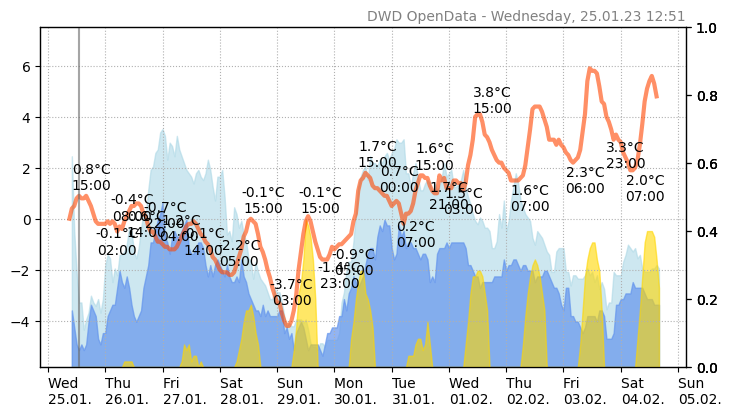

In [16]:
ax1=wp.plot("10865",image_file='weather.png', close_plot=False)
# Image('weather.png')

In [ ]:
from ipyleaflet import Map, Marker, MarkerCluster, AwesomeIcon

In [ ]:
icon_home = AwesomeIcon(
    name='home',
    marker_color='blue',
    icon_color='black',
    spin=False
)
icon_station = AwesomeIcon(
    name = 'thermometer-4',
    marker_color='blue',
    icon_color='black',
    spin=False
)


In [12]:
home=(my_lat,my_lon)
center=(min(sl['Breite'])+(max(sl['Breite'])-min(sl['Breite']))/2, min(sl['Länge'])+(max(sl['Länge'])-min(sl['Länge']))/2)
m=Map(center=center, zoom=8)

NameError: name 'my_lat' is not defined

In [214]:
marker = Marker(location=home, icon=icon_home, draggable=False, title="DWD weather station")
m.add_layer(marker);

display(m)

Map(center=[51.141000000000005, 10.469999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text'…

In [215]:
min(sl['Breite'])

47.271

In [216]:
max(sl['Breite'])

55.011

In [217]:
import pandas as pd

In [218]:
stations=[]
for i in range(len(sl)):
    if d._is_uptodate(i) is True:
        stations.append((sl['Breite'][i], sl['Länge'][i], sl['Stationsname'][i], sl['Kennung'][i], sl['Stations-kennung'][i], sl['Ende'][i]))

In [219]:
len(stations)

5910

In [220]:
len(sl)

18676

In [16]:
import time
import datetime

In [17]:
stations[:10]

NameError: name 'stations' is not defined

In [223]:
dt=(datetime.datetime.now()-sl['EndeDT'][3]).total_seconds()

In [18]:
from urllib.request import urlopen

In [19]:
def get_forecast_stations():
    url='https://opendata.dwd.de/weather/local_forecasts/mos/MOSMIX_L/single_stations'
    try:
        resp=urlopen(url)
        data=resp.read()
    except Exception as e:
        logging.error(f"Failed to download {url}: {e}")
        return None
    return data

In [20]:
data=get_forecast_stations()

In [21]:
from bs4 import BeautifulSoup

In [22]:
soup = BeautifulSoup(data, 'html.parser')
raw_stations = []
for a in soup.find_all('a', href=True): 
    if a.text: 
        raw_stations.append(a['href'][:-1])
raw_stations=raw_stations[1:]

In [23]:
raw_stations[:10]

['01001',
 '01008',
 '01025',
 '01028',
 '01049',
 '01052',
 '01059',
 '01089',
 '01092',
 '01112']

In [24]:
len(raw_stations)

6028

In [25]:
val_stations=[]
for i in range(len(sl)):
    val_stations.append(sl['Stations-kennung'][i])

NameError: name 'sl' is not defined

In [232]:
len(val_stations), len(raw_stations)

(18676, 5899)

In [233]:
vir=[]
riv=[]
for i in range(len(val_stations)):
    if val_stations[i] in raw_stations:
        if val_stations[i] not in vir:
            vir.append(val_stations[i])
for i in range(len(raw_stations)):
    if raw_stations[i] in val_stations:
        riv.append(raw_stations[i])
vir=sorted(vir)
riv=sorted(riv)

In [234]:
len(vir), len(riv)

(1750, 1750)

In [235]:
markers=[]
done=[]
for i in range(len(sl)):
    kenn=sl['Stations-kennung'][i]
    name=sl['Stationsname'][i]
    if (kenn in vir) and (name not in done):
        done.append(name)
        marker = Marker(location=(sl['Breite'][i], sl['Länge'][i]), icon=icon_station, draggable=False, title=f"{name}, id={kenn}")
        markers.append(marker)

In [236]:
len(markers)

1965

In [237]:
marker_cluster = MarkerCluster(
    markers=markers
)

In [238]:
m.add_layer(marker_cluster)

In [239]:
m

Map(center=[51.141000000000005, 10.469999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text'…